# Statistic Creation

This notebook is used to create the statistics based on the collected users file.

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_users = os.path.join("users_edited.json")
attributes = ["Reputation", "votes", "avotes", "qvotes", "count_of_answers", "count_of_questions"]

In [4]:
f = open(path_users, 'r')
users_dict = json.load(f)
users = []
for key, val in users_dict.items():
    users.append(val)

In [50]:
def create_histogram(list_, attribute, bins=5):
    print (attribute)
    attributes = [ int(elem[attribute]) for elem in list_]
    print (np.where(np.asarray(attributes) == 0)[0].shape[0])
    attributes = [x for x in attributes if x != 0]
    print (np.where(np.asarray(attributes) == 0)[0].shape[0])
    attributes = [ np.log(elem) for elem in attributes]
    plt.hist(attributes, bins=bins)
    plt.yscale('log')
    plt.xticks()
    plt.show()
    return np.histogram(attributes, bins=bins)

In [ ]:
# create histograms    
for attr in attributes:
    numbers, bins = create_histogram(users, attr)
    print (numbers, bins)
    dict_hist = {}
    dict_hist["numbers"] = numbers.tolist()
    dict_hist["bins"] = bins.tolist()

    with open( attr + "_hist.json", 'w') as r:
        json.dump(dict_hist, r)

In [6]:
def create_ordered_scatter(list_, attribute):
    print (attribute)
    attributes = [ int(elem[attribute]) for elem in list_ if not int(elem[attribute]) == 1]
    attributes = sorted(attributes)
    plt.plot(attributes)
    plt.yscale('log')
    plt.show()

Reputation


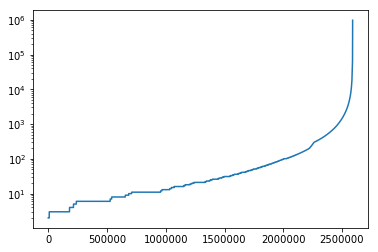

Reputation
0


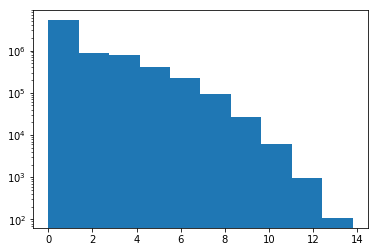

[5207129  891061  772370  400569  220242   91476   27103    6159     973
     109]
[  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.30000000e+01
   2.48000000e+02   9.85000000e+02   3.90700000e+03   1.55080000e+04
   6.15460000e+04   2.44257000e+05   9.69386000e+05]


In [35]:
# create scatters
for attr in ["Reputation"]:
    create_ordered_scatter(users, attr)
    hist = (create_histogram(users, attr, bins=None))
    print (hist[0])
    print (np.rint(np.exp(hist[1])))

count_of_answers


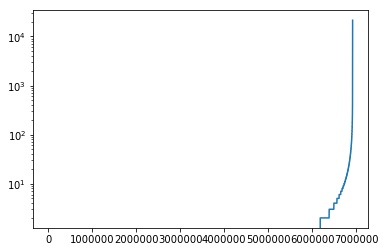

count_of_answers
6185087
0


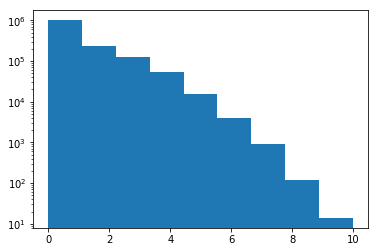

[1004103  229472  124900   53292   15414    3884     907     118      14]
[  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.80000000e+01
   8.40000000e+01   2.55000000e+02   7.71000000e+02   2.33600000e+03
   7.07600000e+03   2.14280000e+04]


In [51]:
# create scatters
for attr in ["count_of_answers"]:
    create_ordered_scatter(users, attr)
    hist = (create_histogram(users, attr, bins=9))
    print (hist[0])
    print (np.rint(np.exp(hist[1])))

count_of_questions


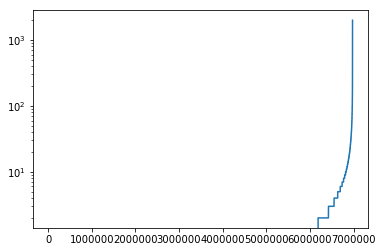

count_of_questions
6187616
0


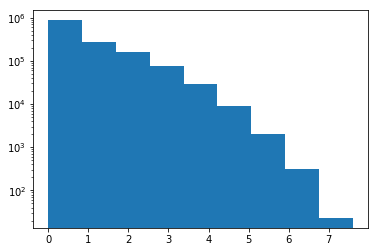

[876628 269964 164592  77946  29020   9025   2060    317     23]
[  1.00000000e+00   2.00000000e+00   5.00000000e+00   1.30000000e+01
   2.90000000e+01   6.80000000e+01   1.58000000e+02   3.68000000e+02
   8.56000000e+02   1.99100000e+03]


In [52]:
# create scatters
for attr in ["count_of_questions"]:
    create_ordered_scatter(users, attr)
    hist = (create_histogram(users, attr, bins=9))
    print (hist[0])
    print (np.rint(np.exp(hist[1])))